In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
from datetime import datetime
from config import api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [19]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/31/21'

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)): 
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | turka
Processing Record 2 of Set 13 | margate
Processing Record 3 of Set 13 | sinjah
City not found. Skipping...
Processing Record 4 of Set 13 | chiojdeanca
Processing Record 5 of Set 13 | bethel
Processing Record 6 of Set 13 | saint-pierre
Processing Record 7 of Set 13 | severo-kurilsk
Processing Record 8 of Set 13 | hovd
Processing Record 9 of Set 13 | wewak
Processing Record 10 of Set 13 | beringovskiy
Processing Record 11 of Set 13 | homer
Processing Record 12 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 13 | hithadhoo
Processing Record 14 of Set 13 | srednekolymsk
Processing Record 15 of Set 13 | hobart
Processing Record 16 of Set 13 | ushuaia
Processing Record 17 of Set 13 | ponta do sol
Processing Record 18 of Set 13 | nikolskoye
Processing Record 19 of Set 13 | atuona
Processing Record 20 of Set 13 | bengkulu
Processing Record 21 of Set 13 | tiksi
Pro

Processing Record 31 of Set 16 | umm kaddadah
Processing Record 32 of Set 16 | krasnoarmeyskiy
Processing Record 33 of Set 16 | ormara
Processing Record 34 of Set 16 | mokhotlong
Processing Record 35 of Set 16 | yellowknife
Processing Record 36 of Set 16 | cabedelo
Processing Record 37 of Set 16 | touros
Processing Record 38 of Set 16 | tezu
Processing Record 39 of Set 16 | santo tomas
Processing Record 40 of Set 16 | vestmannaeyjar
Processing Record 41 of Set 16 | tafresh
Processing Record 42 of Set 16 | marcona
City not found. Skipping...
Processing Record 43 of Set 16 | port lincoln
Processing Record 44 of Set 16 | quelimane
Processing Record 45 of Set 16 | kodiak
Processing Record 46 of Set 16 | manado
Processing Record 47 of Set 16 | staryy nadym
Processing Record 48 of Set 16 | tosya
Processing Record 49 of Set 16 | brownsville
Processing Record 50 of Set 16 | grindavik
Processing Record 1 of Set 17 | genhe
Processing Record 2 of Set 17 | belushya guba
City not found. Skipping...

Processing Record 18 of Set 20 | bairiki
Processing Record 19 of Set 20 | birin
Processing Record 20 of Set 20 | requena
Processing Record 21 of Set 20 | ayan
Processing Record 22 of Set 20 | kupino
Processing Record 23 of Set 20 | aklavik
Processing Record 24 of Set 20 | ola
Processing Record 25 of Set 20 | nanchang
Processing Record 26 of Set 20 | arica
Processing Record 27 of Set 20 | salisbury
Processing Record 28 of Set 20 | komsomolskiy
Processing Record 29 of Set 20 | airai
Processing Record 30 of Set 20 | santa maria
Processing Record 31 of Set 20 | valparaiso
Processing Record 32 of Set 20 | raudeberg
Processing Record 33 of Set 20 | khani
Processing Record 34 of Set 20 | hasaki
Processing Record 35 of Set 20 | hobyo
Processing Record 36 of Set 20 | holland
Processing Record 37 of Set 20 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 20 | atar
Processing Record 39 of Set 20 | boffa
Processing Record 40 of Set 20 | okha
Processing Record 41 of Set 20 | dong

Processing Record 3 of Set 24 | chikwawa
Processing Record 4 of Set 24 | tateyama
Processing Record 5 of Set 24 | atambua
Processing Record 6 of Set 24 | zhanatas
City not found. Skipping...
Processing Record 7 of Set 24 | syracuse
Processing Record 8 of Set 24 | linxi
Processing Record 9 of Set 24 | the valley
Processing Record 10 of Set 24 | nome
Processing Record 11 of Set 24 | duku
Processing Record 12 of Set 24 | victor harbor
Processing Record 13 of Set 24 | birjand
Processing Record 14 of Set 24 | puerto carreno
Processing Record 15 of Set 24 | anloga
Processing Record 16 of Set 24 | juneau
Processing Record 17 of Set 24 | vanavara
Processing Record 18 of Set 24 | sistranda
Processing Record 19 of Set 24 | oktyabrskoye
Processing Record 20 of Set 24 | lang suan
Processing Record 21 of Set 24 | port-gentil
Processing Record 22 of Set 24 | san policarpo
Processing Record 23 of Set 24 | wajima
Processing Record 24 of Set 24 | tsumeb
Processing Record 25 of Set 24 | dakar
Processing

In [10]:
len(city_data)

564

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Turka,49.1541,23.0297,41.94,63,0,5.68,UA,2021-10-31 23:44:16
1,Margate,51.3813,1.3862,52.70,77,29,4.00,GB,2021-10-31 23:44:16
2,Chiojdeanca,45.1667,26.2667,47.52,66,94,1.66,RO,2021-10-31 23:44:17
3,Bethel,41.3712,-73.4140,58.93,87,90,9.22,US,2021-10-31 23:44:17
4,Saint-Pierre,-21.3393,55.4781,68.29,77,0,5.75,RE,2021-10-31 23:40:19
5,Severo-Kurilsk,50.6789,156.1250,35.51,55,98,26.49,RU,2021-10-31 23:44:17
6,Hovd,48.0056,91.6419,34.50,41,84,14.32,MN,2021-10-31 23:43:21
7,Wewak,-3.5534,143.6268,79.45,91,100,9.80,PG,2021-10-31 23:44:18
8,Beringovskiy,63.0500,179.3167,7.34,89,98,13.22,RU,2021-10-31 23:44:18
9,Homer,59.6425,-151.5483,49.89,62,75,3.44,US,2021-10-31 23:44:18


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Turka,UA,2021-10-31 23:44:16,49.1541,23.0297,41.94,63,0,5.68
1,Margate,GB,2021-10-31 23:44:16,51.3813,1.3862,52.70,77,29,4.00
2,Chiojdeanca,RO,2021-10-31 23:44:17,45.1667,26.2667,47.52,66,94,1.66
3,Bethel,US,2021-10-31 23:44:17,41.3712,-73.4140,58.93,87,90,9.22
4,Saint-Pierre,RE,2021-10-31 23:40:19,-21.3393,55.4781,68.29,77,0,5.75
5,Severo-Kurilsk,RU,2021-10-31 23:44:17,50.6789,156.1250,35.51,55,98,26.49
6,Hovd,MN,2021-10-31 23:43:21,48.0056,91.6419,34.50,41,84,14.32
7,Wewak,PG,2021-10-31 23:44:18,-3.5534,143.6268,79.45,91,100,9.80
8,Beringovskiy,RU,2021-10-31 23:44:18,63.0500,179.3167,7.34,89,98,13.22
9,Homer,US,2021-10-31 23:44:18,59.6425,-151.5483,49.89,62,75,3.44


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

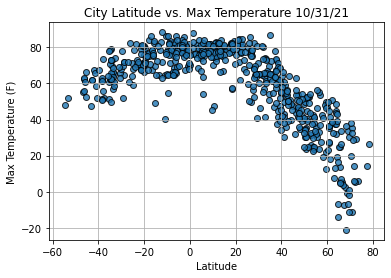

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()